In [19]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
langs = [
    "eng", 
    "mon"
]

colors = [
    "red", 
    "blue", 
    "green", 
    "yellow", 
    "pink", 
    "brown", 
    "orange"
]

markers = [
    
]


In [21]:
def readLang(str):
    categories = {}
    with open(str) as f:
        for line in f.readlines():
            line = line.split("\t")
            if line[2].strip() not in categories:
                categories[line[2].strip()] = 0
            else:
                categories[line[2].strip()] += 1
    
    categories["all"] = sum(categories.values())

    return categories

def readJson(str):
    datafile = open(str, "r")
    return json.load(datafile)



In [22]:
dfs = []

for ind, lang in enumerate(langs): 
    dc = None   
    data = pd.read_json(f"transformer2/resultjson/{lang}.json")
    data["lang"]=lang
    if lang != "spa":
        dc = readLang(f"data/{lang}.word.train.tsv")
        for index in data.index:
            data.loc[index, "data_count"] = dc[data.loc[index, "category"]]

    dfs.append(data)

dd = pd.concat(dfs, sort=False)
display(dd)


,category,distance,precision,recall,f_measure,lang,data_count
0,000,0.277771,67.606715,81.810795,74.033613,eng,68862.0
1,001,0.232454,89.847842,89.535173,89.691235,eng,16151.0
2,010,0.487820,88.184556,84.961069,86.542806,eng,168111.0
3,011,0.694226,89.245368,81.443299,85.166020,eng,6083.0
4,100,0.261956,84.092298,91.064041,87.439422,eng,96544.0
5,101,0.243490,92.753984,87.359287,89.975845,eng,11375.0
6,110,0.479986,91.589758,85.687219,88.540225,eng,88819.0
7,111,1.204082,85.966461,68.736768,76.392157,eng,2739.0
8,all,0.399209,86.848193,86.027792,86.436046,eng,458684.0
0,000,0.150000,80.790960,89.375000,84.866469,mon,1282.0


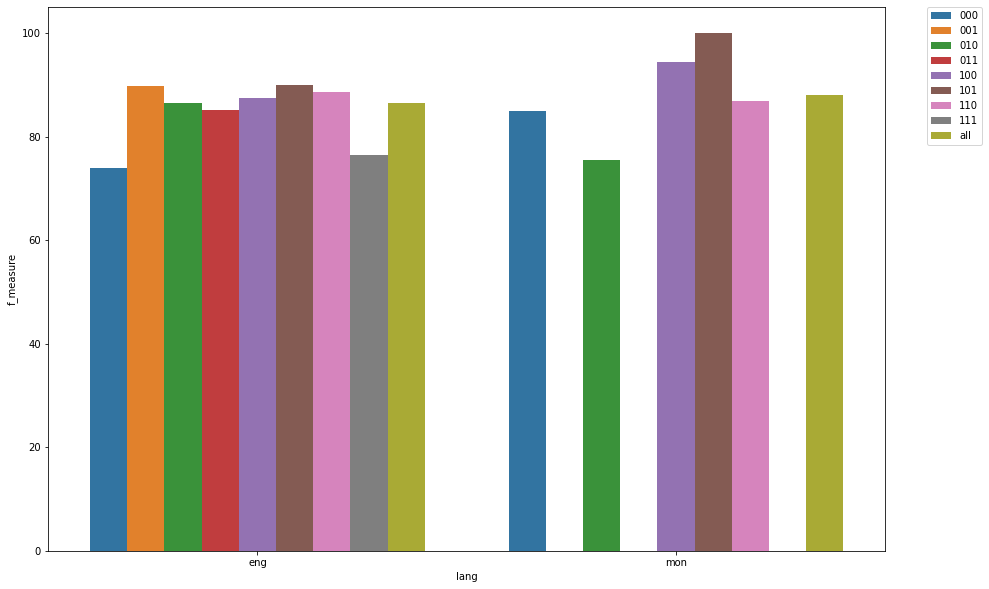

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=dd, x="lang", y="f_measure", hue="category", ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("lang_fmeasure2.png")


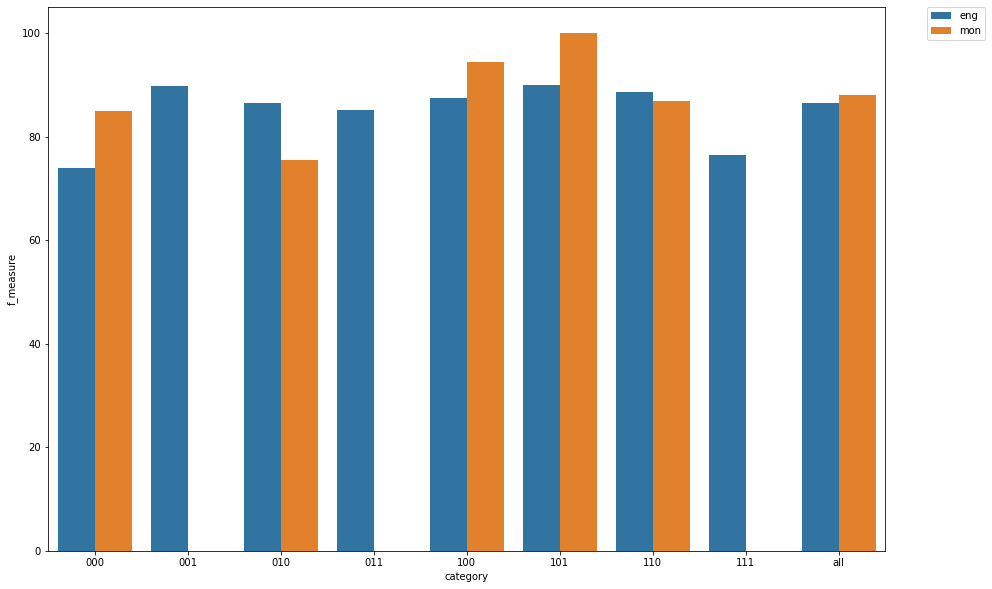

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=dd, x="category", y="f_measure", hue="lang", ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("cat_fmeasure2.png")

  category  distance   precision      recall   f_measure lang  data_count
0      000  0.277771   67.606715   81.810795   74.033613  eng     68862.0
1      001  0.232454   89.847842   89.535173   89.691235  eng     16151.0
2      010  0.487820   88.184556   84.961069   86.542806  eng    168111.0
3      011  0.694226   89.245368   81.443299   85.166020  eng      6083.0
4      100  0.261956   84.092298   91.064041   87.439422  eng     96544.0
5      101  0.243490   92.753984   87.359287   89.975845  eng     11375.0
6      110  0.479986   91.589758   85.687219   88.540225  eng     88819.0
7      111  1.204082   85.966461   68.736768   76.392157  eng      2739.0
8      all  0.399209   86.848193   86.027792   86.436046  eng    458684.0
0      000  0.150000   80.790960   89.375000   84.866469  mon      1282.0
1      010  0.859091   78.541667   72.500000   75.400000  mon      1759.0
2      100  0.170564   94.174092   94.497937   94.335736  mon      5811.0
3      101  0.000000  100.000000  100.

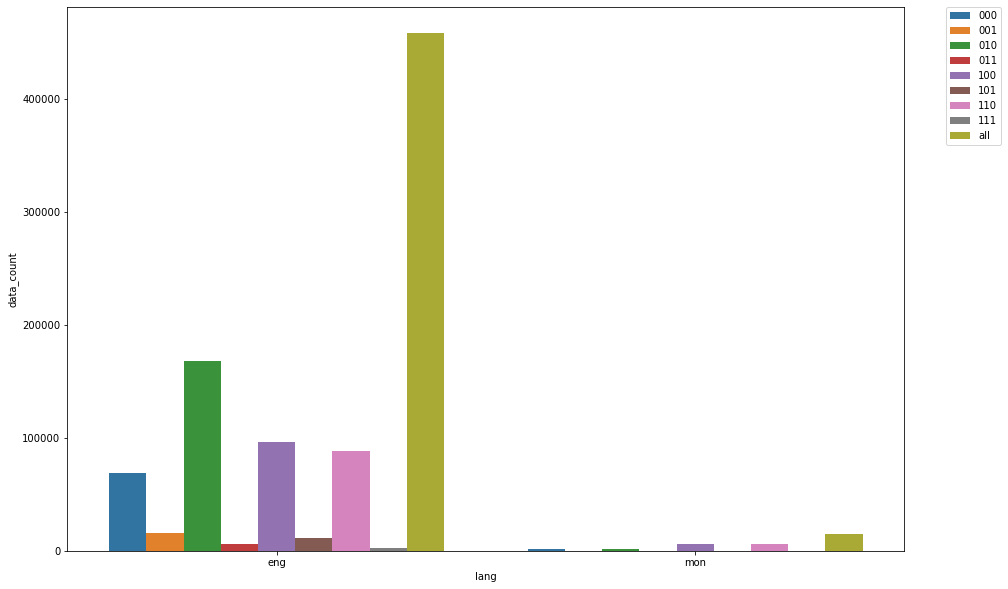

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
data_copy = dd.copy()
data_copy = data_copy[data_copy['lang'] != 'spa']
print(data_copy)
sns.barplot(data=data_copy, x="lang", y="data_count", hue="category", ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("lang_datacount2.png")